## Data Initialization

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Discount factor
gamma = 0.9

In [3]:
# Termination condition
termination = 1e-6

In [4]:
# Define instant rewards
R = {
    'Facebook': -1,
    'Class 1': -2,
    'Class 2': -2,
    'Class 3': -2,
    'Pub': 1,
    'Pass': 10,
    'Sleep': 0  # Termination state
}

In [5]:
# Initializes the V value, setting the initial value of all states to 0
V = {
    'Facebook': 0,
    'Class 1': 0,
    'Class 2': 0,
    'Class 3': 0,
    'Pub': 0,
    'Pass': 0,
    'Sleep': 0  # Termination state
}

## Iteration Algorithm

In [6]:
def iteration_algorithm(V, R, gamma, termination):
    iteration = 0
    V_record = []
    while True:
        delta = 0
        V_old = V.copy()
        V_record.append(V_old)

        # Bellman equation, calculating state V
        V['Facebook'] = R['Facebook'] + gamma * (0.9 * V_old['Facebook'] + 0.1 * V_old['Class 1'])
        V['Class 1'] = R['Class 1'] + gamma * (0.5 * V_old['Facebook'] + 0.5 * V_old['Class 2'])
        V['Class 2'] = R['Class 2'] + gamma * (0.2 * V_old['Sleep'] + 0.8 * V_old['Class 3'])
        V['Class 3'] = R['Class 3'] + gamma * (0.6 * V_old['Pass'] + 0.4 * V_old['Pub'])
        V['Pub'] = R['Pub'] + gamma * (0.2 * V_old['Class 1'] + 0.4 * V_old['Class 2'] + 0.4 * V_old['Class 3'])
        V['Pass'] = R['Pass'] + gamma * V_old['Sleep']
        V['Sleep'] = 0

        # Calculate the change in V value delta
        delta = max(delta, max(abs(V[state] - V_old[state]) for state in V))

        iteration += 1
        print(f'Iteration {iteration}: {V}')

        # Check whether the termination condition has been met
        if delta < termination:
            V_record.append(V)
            break

    return V, iteration, V_record

## Result

In [7]:
V, iterations, V_record = iteration_algorithm(V, R, gamma, termination)

print('\nFinal V:')
for state, value in V.items():
    print(f'V({state}) = {value}')
print(f'\nTotal iterations: {iterations}')

Iteration 1: {'Facebook': -1.0, 'Class 1': -2.0, 'Class 2': -2.0, 'Class 3': -2.0, 'Pub': 1.0, 'Pass': 10.0, 'Sleep': 0}
Iteration 2: {'Facebook': -1.9900000000000002, 'Class 1': -3.35, 'Class 2': -3.4400000000000004, 'Class 3': 3.7600000000000007, 'Pub': -0.8, 'Pass': 10.0, 'Sleep': 0}
Iteration 3: {'Facebook': -2.9134, 'Class 1': -4.4435, 'Class 2': 0.7072000000000007, 'Class 3': 3.112, 'Pub': 0.5122000000000002, 'Pass': 10.0, 'Sleep': 0}
Iteration 4: {'Facebook': -3.7597690000000004, 'Class 1': -2.99279, 'Class 2': 0.2406400000000004, 'Class 3': 3.5843920000000002, 'Pub': 1.5750820000000003, 'Pass': 10.0, 'Sleep': 0}
Iteration 5: {'Facebook': -4.31476399, 'Class 1': -3.58360805, 'Class 2': 0.5807622400000008, 'Class 3': 3.9670295200000005, 'Pub': 1.8383093200000005, 'Pass': 10.0, 'Sleep': 0}
Iteration 6: {'Facebook': -4.817483556400001, 'Class 1': -3.6803007875, 'Class 2': 0.8562612544000006, 'Class 3': 4.0617913552000005, 'Pub': 1.9921555846000003, 'Pass': 10.0, 'Sleep': 0}
Iterati

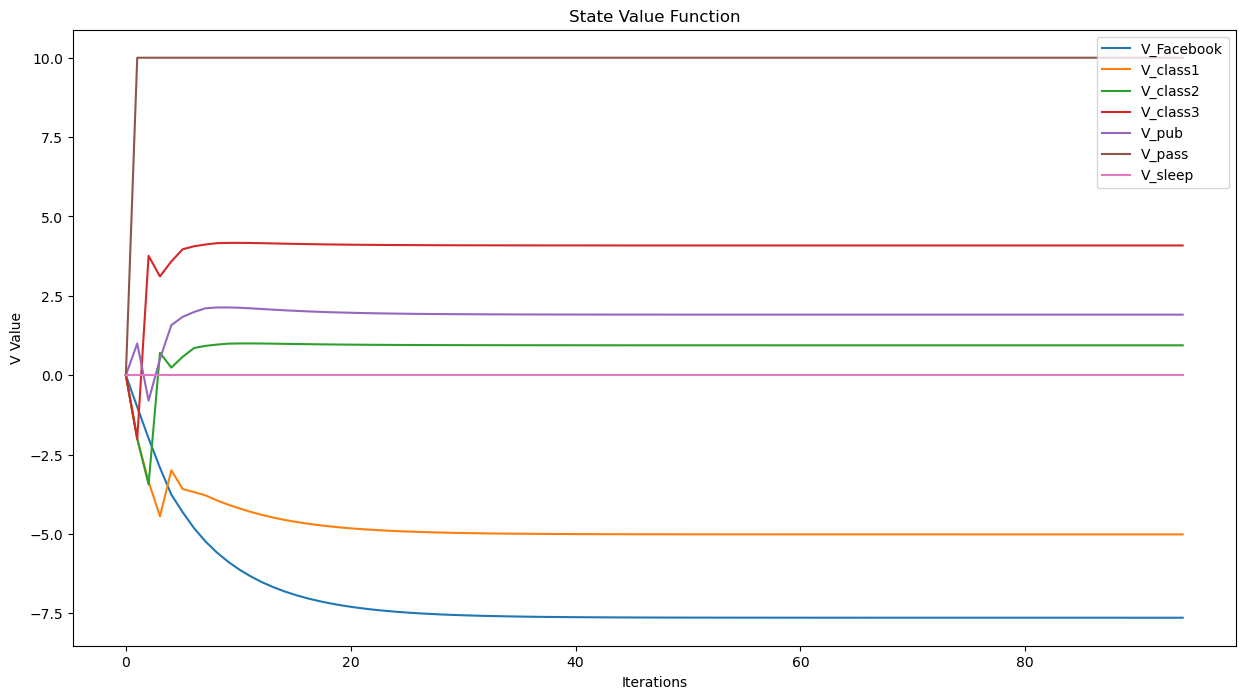

In [9]:
V_facebook = [item['Facebook'] for item in V_record]
V_class1 = [item['Class 1'] for item in V_record]
V_class2 = [item['Class 2'] for item in V_record]
V_class3 = [item['Class 3'] for item in V_record]
V_pub = [item['Pub'] for item in V_record]
V_pass = [item['Pass'] for item in V_record]
V_sleep = [item['Sleep'] for item in V_record]

x = np.linspace(0, iterations + 1, iterations + 1)

plt.figure(figsize=(15, 8))
plt.plot(x, V_facebook, label='V_Facebook')
plt.plot(x, V_class1, label='V_class1')
plt.plot(x, V_class2, label='V_class2')
plt.plot(x, V_class3, label='V_class3')
plt.plot(x, V_pub, label='V_pub')
plt.plot(x, V_pass, label='V_pass')
plt.plot(x, V_sleep, label='V_sleep')
plt.title('State Value Function')
plt.xlabel('Iterations')
plt.ylabel('V Value')

plt.legend(loc='upper right')
plt.show()